# Task 2: Clustering

## Using clustering to investigate a data set "country_data.csv" 

In [20]:
# importing libraries    
import numpy as np    
import matplotlib.pyplot as mtp    
import pandas as pd
import seaborn as sns

In [21]:
# Importing the dataset  
ds = pd.read_csv('country_data.csv')  

In [22]:
ds

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#### From the above we can see that the dataset consists of 9 socio economic factors which are used in determining the development of a country, i.e developed, developing and underdeveloped countries.

##### Thus we can perfom the analysis of countries development

In [23]:
#understanding the variables of our dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [24]:
ds.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Using the describe method to obtain a statistical summary of the dataset.


In [25]:

ds.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### plotting a correlation heatmap

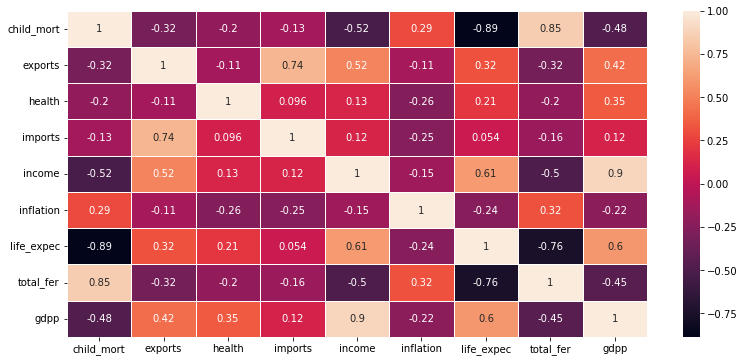

In [26]:
mtp.figure(figsize=(13, 6))
#mask = np.triu(np.ones_like(dataset.corr()))
dataplot = sns.heatmap(ds.corr(),linewidths=1, annot=True)

##### Since GDPP is the measure of development we sort correclation base on the gdpp

In [30]:
ds.corr()['gdpp'].sort_values()

child_mort   -0.483032
total_fer    -0.454910
inflation    -0.221631
imports       0.115498
health        0.345966
exports       0.418725
life_expec    0.600089
income        0.895571
gdpp          1.000000
Name: gdpp, dtype: float64

## Clusttering just two features of the dataset

In [88]:
features = ds[['total_fer','child_mort']]

In [89]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
data =sd.fit_transform(features)

### Finding optimal number of clusters using the elbow method 

#### Determining the WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster

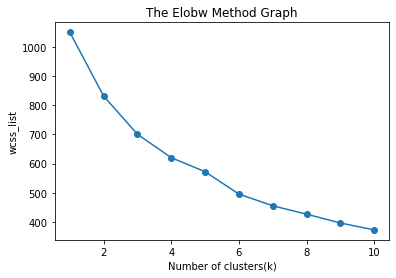

In [102]:
#Choosing k-value for K means algorithm
from sklearn.cluster import KMeans  

wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for 10 iterations
for i in range(2, 12):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(data)
    wcss_list.append(kmeans.inertia_)

mtp.plot(range(1, 11), wcss_list, marker='o')  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show() 

In [91]:
km = KMeans(n_clusters=3)
label =km.fit_predict(data)


In [92]:
print(km.labels_)
print(km.labels_.shape)

[1 0 2 1 0 0 0 0 0 0 0 0 2 0 0 0 0 1 2 2 0 2 0 0 0 1 1 2 1 0 0 1 1 0 0 0 1
 1 2 0 1 0 0 0 0 2 0 2 0 1 2 0 0 0 0 2 1 0 0 2 0 0 2 1 1 2 1 0 0 2 0 0 2 0
 0 0 0 0 2 0 2 2 0 2 2 0 0 2 1 0 0 0 0 2 1 0 0 1 0 1 0 2 0 0 0 0 1 2 2 2 0
 0 1 1 0 0 2 0 0 0 2 0 0 0 0 0 2 2 0 1 0 0 1 0 0 0 2 2 0 0 0 0 1 0 0 0 2 1
 0 1 1 2 0 0 2 1 0 0 0 0 0 0 2 0 0 2 1]
(167,)


### visulaizing the clusters

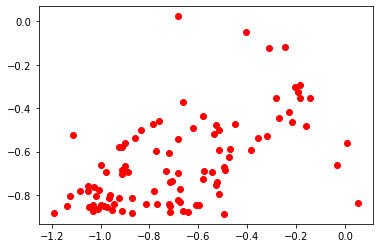

In [93]:
#splling rows of  data
label_0 = data[label == 0]
label_1 = data[label == 1]
label_2 = data[label == 2]


 
#plotting the results
mtp.scatter(label_0[:,0] , label_0[:,1], color = 'red')



mtp.show()

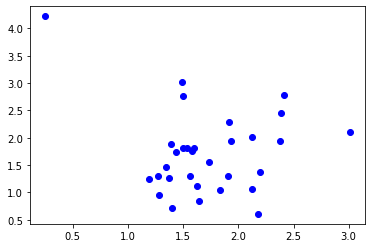

In [94]:
 
#plotting the results
mtp.scatter(label_1[:,0] , label_1[:,1], color = 'blue')



mtp.show()

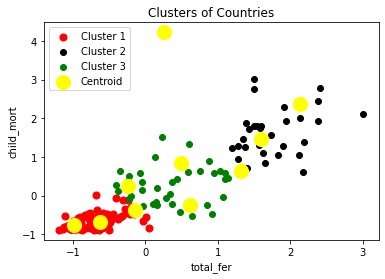

In [96]:
#Plotting the results
label_0 = data[label == 0]
label_1 = data[label == 1]
label_2 = data[label == 2]

mtp.scatter(label_0[:,0] , label_0[:,1] , color = 'red', s = 50,  label = 'Cluster 1')
mtp.scatter(label_1[:,0] , label_1[:,1] , color = 'black',label = 'Cluster 2')
mtp.scatter(label_2[:,0] , label_2[:,1] , color = 'green', label = 'Cluster 3')
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroid')   

mtp.title('Clusters of Countries')  
mtp.xlabel('total_fer')  
mtp.ylabel('child_mort')  
mtp.legend()  
mtp.show() 

Since high birth rates appear to reduce economic growth of a county which also affect Child mortality.
Thus we could say:

- Cluster1 shows countries with low Child mortality and low fertility. These countries can be categorized as developed countries.
- Cluster2 shows countries with average Child mortality and average fertility. These countries can be categorized as developing countries 
- Cluster1 shows countries with high Child mortality and high fertility. These countries can be categorized as undeveloped countries


From the above plot, we can see the elbow point is at 3. So the number of clusters here will be 3.

### Including many features

In [98]:
x= ds.drop('country', axis=1)


### Finding optimal number of clusters using the elbow method 

In [103]:
x

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#### Scaling the dataset

In [105]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
data =sd.fit_transform(x)

#### Determining the WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster

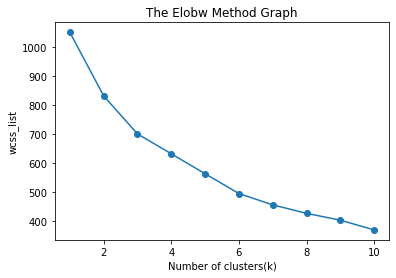

In [106]:
 
#Choosing k-value for K means algorithm
from sklearn.cluster import KMeans  

wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for 10 iterations
for i in range(2, 12):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 101)  
    kmeans.fit(data)  
    wcss_list.append(kmeans.inertia_)

mtp.plot(range(1, 11), wcss_list, marker='o')  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show() 

From the above plot, we can see the elbow point is at 3. So the number of clusters here will be 3.

### Training the K-means model on the dataset  

In [107]:
km = KMeans(n_clusters=3)
label =km.fit_predict(data)


In [108]:
print(km.labels_)
print(km.labels_.shape)

[0 1 1 0 1 1 1 2 2 1 1 2 1 1 1 2 1 0 1 1 1 0 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 2 2 2 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 1 2 1 1 1 0 2
 2 2 1 2 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 2
 2 0 0 2 1 0 1 1 1 1 1 2 2 1 1 0 1 1 0 1 1 0 2 2 2 1 0 2 2 1 1 0 1 2 2 1 0
 1 0 0 1 1 1 1 0 1 2 2 2 1 1 1 1 1 0 0]
(167,)


### visulaizing the clusters

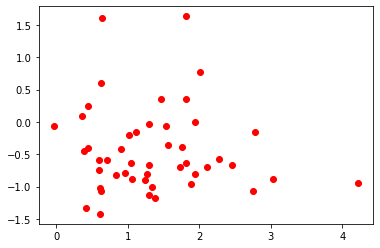

In [109]:
#splling rows of  data
label_0 = data[label == 0]
label_1 = data[label == 1]
label_2 = data[label == 2]


 
#plotting the results
mtp.scatter(label_0[:,0] , label_0[:,1], color = 'red')



mtp.show()

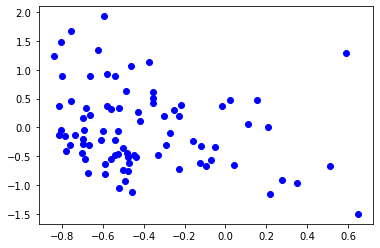

In [116]:
 
#plotting the results
mtp.scatter(label_1[:,0] , label_1[:,1], color = 'blue')



mtp.show()

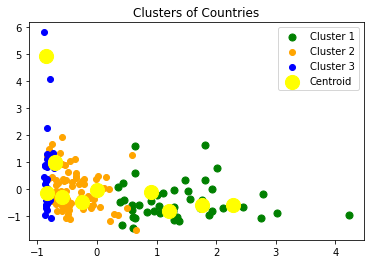

In [115]:
#Plotting the results
label_0 = data[label == 0]
label_1 = data[label == 1]
label_2 = data[label == 2]

mtp.scatter(label_0[:,0] , label_0[:,1] , color = 'green', s = 50,  label = 'Cluster 1')
mtp.scatter(label_1[:,0] , label_1[:,1] , color = 'orange',label = 'Cluster 2')
mtp.scatter(label_2[:,0] , label_2[:,1] , color = 'blue', label = 'Cluster 3')
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroid')   

mtp.title('Clusters of Countries')  
 
mtp.legend()  
mtp.show() 

### Aplying Principal Component Analysis (PCA)

In [112]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#Transform the data
pca_model = pca.fit_transform(data)
data_transform = pd.DataFrame(data = pca_model, columns = ['PCA1', 'PCA2'])
data_transform['Cluster'] = label

In [113]:
data_transform.head()

,PCA1,PCA2,Cluster
0,-2.913025,0.095621,0
1,0.429911,-0.588156,1
2,-0.285225,-0.455174,1
3,-2.932423,1.695555,0
4,1.033576,0.136659,1


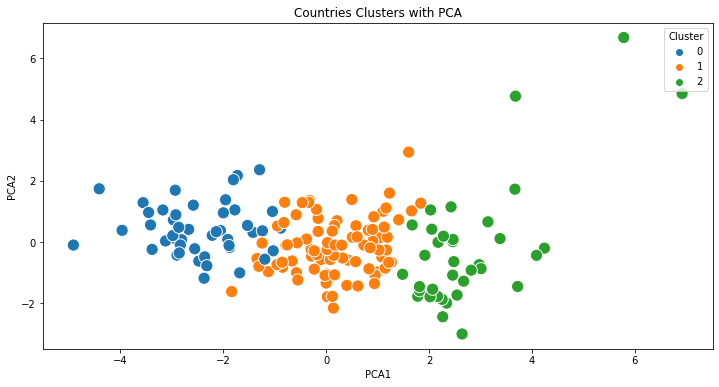

In [114]:
mtp.figure(figsize=(12,6))
g = sns.scatterplot(data=data_transform, x='PCA1', y='PCA2', s= 150, palette=sns.color_palette()[:3], hue='Cluster')
title = mtp.title('Countries Clusters with PCA')

#### The conducted analysis proved that all the countries can be divided into 3 groups, based on their development: 
from the right hand to the left
- Highly developed countries(green clusters) - mostly West Europe and North America. 
- Developing countries(orange clusters) - mostly North African/Central and Eastern Europe. 
- Underdeveloped countries(blue clusters) - almost exclusively Sub-Saharan Africa.